In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [5]:
def synthetic_data(w, b, num_examples):
    # 生成y=Xw+b+噪声
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features:', features[0], '\nlabel:',labels[0])

features: tensor([-0.0243,  0.2140]) 
label: tensor([3.4108])


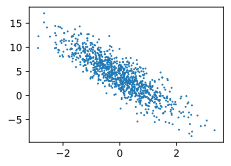

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.6262, -0.6305],
        [-0.5196,  1.1257],
        [-0.7750,  0.3968],
        [-0.3776,  0.4791],
        [ 0.9251,  1.3303],
        [ 0.4858, -0.2853],
        [-1.3414,  0.7395],
        [ 0.5600,  0.0334],
        [-0.6731, -0.4845],
        [-0.5438, -1.1241]]) 
 tensor([[ 5.0904],
        [-0.6736],
        [ 1.3030],
        [ 1.8126],
        [ 1.5389],
        [ 6.1588],
        [-0.9995],
        [ 5.2145],
        [ 4.4786],
        [ 6.9383]])


In [30]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [12]:
def linreg(X, w, b):
    # 线性回归模型
    return torch.matmul(X, w) + b

定义损失函数

In [13]:
def squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape))**2/2

定义优化算法

In [14]:
def sgd(params, lr, batch_size):
    # lr:学习率
    # 小批量随机梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [31]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        # 因为l形状是（batch_size,1），不是一个标量，所以sum后再求梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033163
epoch 2, loss 0.000122
epoch 3, loss 0.000053
epoch 4, loss 0.000052
epoch 5, loss 0.000052
epoch 6, loss 0.000052
epoch 7, loss 0.000053
epoch 8, loss 0.000052
epoch 9, loss 0.000052
epoch 10, loss 0.000052


In [23]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 1.4539, -2.4917], grad_fn=<SubBackward0>)
b的估计误差：tensor([3.1109], grad_fn=<RsubBackward1>)
